# Risk Analysis of Space Shuttle

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\harik'

In [42]:
os.chdir("C:/Users/harik/Desktop/datasets")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
challenger=pd.read_csv("challenger.csv")
challenger

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [5]:
o_ring_failures=challenger['O.ring.failures']

In [6]:
o_ring_failures

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    2
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
Name: O.ring.failures, dtype: int64

In [7]:
temp=challenger['temperature']

In [8]:
temp

0     66
1     70
2     69
3     68
4     67
5     72
6     73
7     70
8     57
9     63
10    70
11    78
12    67
13    53
14    67
15    75
16    70
17    81
18    76
19    79
20    75
21    76
22    58
Name: temperature, dtype: int64

Text(0.5, 0, 'Temperature')

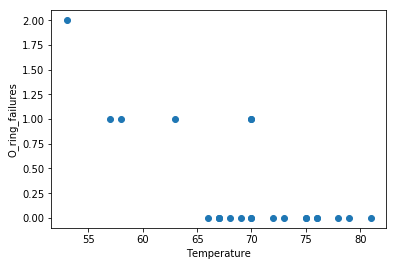

In [9]:
plt.plot(temp,o_ring_failures,'o')
plt.ylabel("O_ring_failures")
plt.xlabel("Temperature")

In [10]:
#non-linear as as temp is increasing sometimes failure is increasing and next time its decreasing


In [11]:
pressure=challenger["pressure"]

In [12]:
pressure

0      50
1      50
2      50
3      50
4      50
5      50
6     100
7     100
8     200
9     200
10    200
11    200
12    200
13    200
14    200
15    200
16    200
17    200
18    200
19    200
20    200
21    200
22    200
Name: pressure, dtype: int64

Text(0.5, 0, 'Pressure')

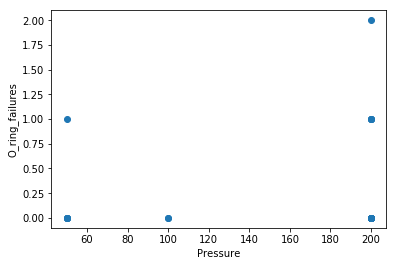

In [13]:
plt.plot(pressure,o_ring_failures,'o')
plt.ylabel("O_ring_failures")
plt.xlabel("Pressure")

In [14]:
challenger.corr()

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
o_ring_ct,NaN,NaN,NaN,NaN,NaN
O.ring.failures,NaN,1.000000,-0.725671,0.220326,-0.011993
temperature,NaN,-0.725671,1.000000,0.039818,0.230770
pressure,NaN,0.220326,0.039818,1.000000,0.839932
launch_id,NaN,-0.011993,0.230770,0.839932,1.000000


In [15]:


challenger.mean()

o_ring_ct            6.000000
O.ring.failures      0.304348
temperature         69.565217
pressure           152.173913
launch_id           12.000000
dtype: float64

In [16]:
mean_o_ring_failures=challenger["O.ring.failures"].mean()

In [17]:
mean_o_ring_failures

0.30434782608695654

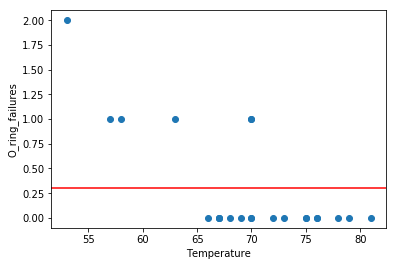

In [18]:
plt.plot(temp,o_ring_failures,'o')
plt.ylabel("O_ring_failures")
plt.xlabel("Temperature")
plt.axhline(mean_o_ring_failures,color='r',linestyle='-')
plt.show()

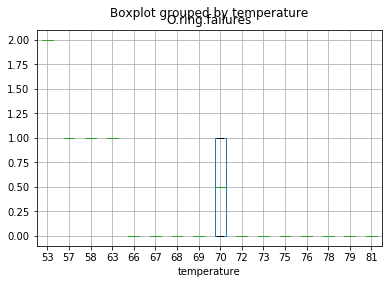

In [19]:
challenger.boxplot(column='O.ring.failures',by='temperature')

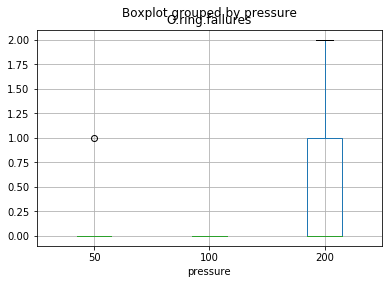

In [20]:



challenger.boxplot(column='O.ring.failures',by='pressure')

In [21]:
import statsmodels.api as sm
model=sm.OLS(o_ring_failures,temp).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     4.755
Date:                Mon, 03 Jun 2019   Prob (F-statistic):             0.0402
Time:                        19:31:09   Log-Likelihood:                -19.595
No. Observations:                  23   AIC:                             41.19
Df Residuals:                      22   BIC:                             42.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature     0.0038      0.002      2.181      0.040       0.000       0.007
==============================================================================
Omnibus:                       14.053   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.853
Skew:                           1.623   Prob(JB):                      0.00162
Kurtosis:                       4.696   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#R-squared=17.8% variance is only explained
# -squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

#R-squared is always between 0 and 100%:

# 0% indicates that the model explains none of the variability of the response data around its mean.
# 100% indicates that the model explains all the variability of the response data around its mean.
#In general, the higher the R-squared, the better the model fits your data. However, there are important conditions for this guideline that I’ll talk about both in this post and my next post.
#"R-squared statistics must be high for a good model(>70%)"
#adj-R-squared is a measure of goodness of fit which is low here 14.0%.
#F-statistic is the measure of impact of multiple inputs over the output
#p>|t| means what is the probability that increase in temp is effecting failure
#alpha=0.05
#95% is confidence interval
#1%  5% 10% are significance interval(alpha)
#null hypothesis means there is no relation between temp and failure.
#if p<alpha then reject null hypothesis
#if p>alpha then accept null hypothesis

In [24]:
model1=sm.OLS(o_ring_failures,pressure).fit()

In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     8.278
Date:                Mon, 03 Jun 2019   Prob (F-statistic):            0.00875
Time:                        19:31:10   Log-Likelihood:                -18.173
No. Observations:                  23   AIC:                             38.35
Df Residuals:                      22   BIC:                             39.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pressure       0.0020      0.001      2.877      0.009       0.001       0.003
==============================================================================
Omnibus:                       11.553   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.660
Skew:                           1.447   Prob(JB):                      0.00799
Kurtosis:                       4.306   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#AIC Akaike information criterion (AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.)
#BIC bayesian information criterion-(the model with the lowest BIC is preferred)

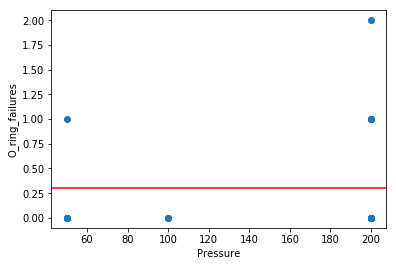

In [27]:
plt.plot(pressure,o_ring_failures,'o')
plt.ylabel("O_ring_failures")
plt.xlabel("Pressure")
plt.axhline(mean_o_ring_failures,color='r',linestyle='-')
plt.show()

# seaborn

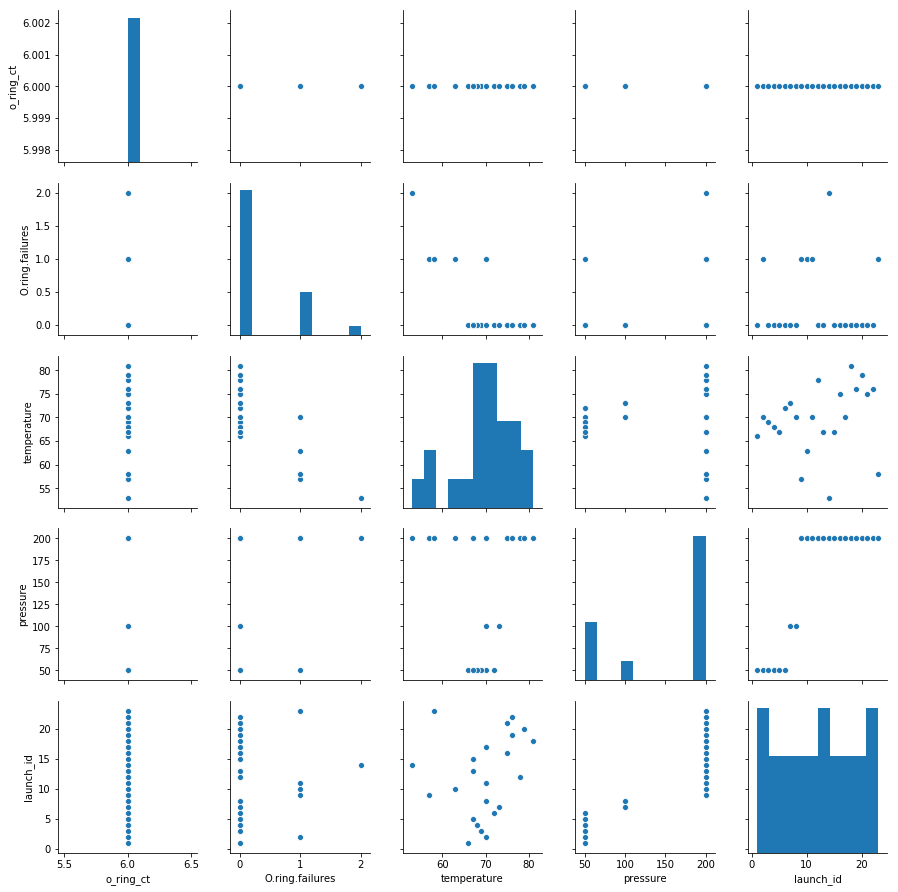

In [28]:
import seaborn as sns
sns.pairplot(challenger)

C:\Users\harik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


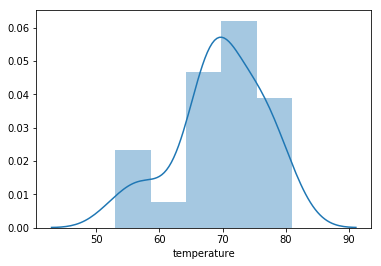

In [29]:
sns.distplot(challenger["temperature"])

In [30]:
#these curves are density curves
#temperature values are approximately normally distributed

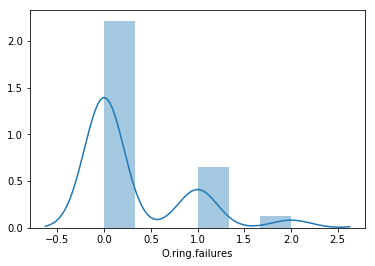

In [31]:
sns.distplot(challenger["O.ring.failures"])

In [32]:
#the o ring failure values are not normally distributed


In [33]:
corr=challenger.corr()

In [34]:
corr

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
o_ring_ct,NaN,NaN,NaN,NaN,NaN
O.ring.failures,NaN,1.000000,-0.725671,0.220326,-0.011993
temperature,NaN,-0.725671,1.000000,0.039818,0.230770
pressure,NaN,0.220326,0.039818,1.000000,0.839932
launch_id,NaN,-0.011993,0.230770,0.839932,1.000000


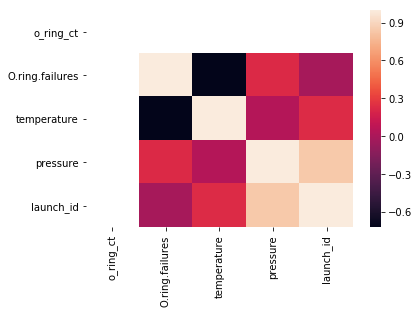

In [35]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [36]:
#light colours are strong positive correlation
#dark colors are negative correlations
#partial correlation between pressure and o.ring.failures(as color is neither light nor dark)


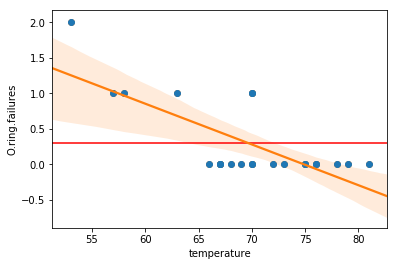

In [37]:
plt.plot(temp,o_ring_failures,'o')
plt.ylabel("O_ring_failures")
plt.xlabel("Temperature")
plt.axhline(mean_o_ring_failures,color='r',linestyle='-')
sns.regplot(x="temperature",y="O.ring.failures",data=challenger)

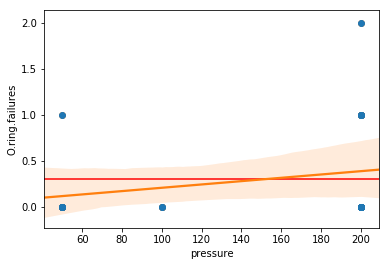

In [38]:
plt.plot(pressure,o_ring_failures,'o')
plt.ylabel("O_ring_failures")
plt.xlabel("Temperature")
plt.axhline(mean_o_ring_failures,color='r',linestyle='-')
sns.regplot(x="pressure",y="O.ring.failures",data=challenger)

In [39]:
#split up the data in 'x' array that contains the features to train on and 'y' array with the target variable.
x=challenger['temperature']#x denotes input
y=challenger['O.ring.failures']#y denotes output

In [40]:
x

0     66
1     70
2     69
3     68
4     67
5     72
6     73
7     70
8     57
9     63
10    70
11    78
12    67
13    53
14    67
15    75
16    70
17    81
18    76
19    79
20    75
21    76
22    58
Name: temperature, dtype: int64

In [59]:
y

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    2
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
Name: O.ring.failures, dtype: int64

In [61]:
x.values.reshape(-1,1)

array([[66],
       [70],
       [69],
       [68],
       [67],
       [72],
       [73],
       [70],
       [57],
       [63],
       [70],
       [78],
       [67],
       [53],
       [67],
       [75],
       [70],
       [81],
       [76],
       [79],
       [75],
       [76],
       [58]], dtype=int64)

In [71]:
from sklearn.model_selection import train_test_split
#X_test=all tet data of temperature
#Y_train =all train data O.ring.failures
#0.4 means we are giving 40% data to test data set
#we have to build model for training data and apply model on tets data
#let my sample be uniform sample for this I give random_state=1

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [66]:
x_train

6     73
17    81
4     67
2     69
5     72
18    76
9     63
7     70
19    79
3     68
0     66
15    75
12    67
Name: temperature, dtype: int64

In [68]:
y_train

6     0
7     0
1     1
14    0
0     0
15    0
22    1
21    0
9     1
8     1
12    0
11    0
5     0
Name: O.ring.failures, dtype: int64

In [69]:
x_train=x_train.values.reshape(-1,1)
#I know column dimension...but I wnat to change into row dimension dats why we used(-1,1)

In [70]:
x_train

array([[73],
       [70],
       [70],
       [67],
       [66],
       [75],
       [58],
       [76],
       [63],
       [57],
       [67],
       [78],
       [72]], dtype=int64)

In [75]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(x_train,y_train)

In [76]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1]:
accuracy=model.score(x_train,y_train)
print('Accuracy of the model:',accuracy)

NameError: name 'model' is not defined

In [80]:
print('intercept',model.intercept_)
print('slope:',model.coef_)

intercept 3.874282260501663
slope: [-0.05197945]


In [81]:
#m=-0.051
#temp=30
#c=3.874
#y=-0.051*30+3.874

In [94]:
x_test=x_test.reshape(-1,1)

In [84]:
x_test

array([[75],
       [81],
       [68],
       [53],
       [79],
       [70],
       [70],
       [67],
       [69],
       [76]], dtype=int64)

In [86]:
#predictions from the model
predictions=model.predict(x_test)
print('predicted O.ring.failures:',predictions,sep='\n')

predicted O.ring.failures:
[-0.02417649 -0.33605319  0.33967966  1.11937141 -0.23209429  0.23572076
  0.23572076  0.39165911  0.28770021 -0.07615594]
